# Aufgabe 1

Bestimmen Sie Experimentell mit einen Testprogramm die relative Maschinengenauigkeit eps in Python. In dem man den folgenden Pseudocode umsetzt

Import some Stuff

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy 
import pandas as pd

In [2]:
n = 0
eps = 1.0
while 1.0 + eps > 1.0:
    eps = eps/2
    n += 1

# Basically use numpy to get single precision float
m = 0 
eps32 = 1.0
while np.float32(1.0 + eps32) > np.float32(1.0):
    eps32 = eps32/2     
    m += 1
    
print('double float eps: 2^-', n)  
print(' = ', 2**(-n))  
print('single float eps: 2^-', m)
print(' = ', 2**(-m))

double float eps: 2^- 53
 =  1.1102230246251565e-16
single float eps: 2^- 24
 =  5.960464477539063e-08


# Aufgabe b)

Zeichnen sie den Graphen der folgenden Funktionen

$ f:(0,10^{-15}) \to R: x \to \frac{(1+x)-1}{x}$

und 

$f:(0,10^{-15}) \to R, x \to \frac{e^x - 1}{x}$

/var/folders/zl/tr4yyt811072b_l4prllbb4m0000gn/T/ipykernel_17382/565183342.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((1+x)-1)/x
/var/folders/zl/tr4yyt811072b_l4prllbb4m0000gn/T/ipykernel_17382/565183342.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return (np.exp(x)-1)/x


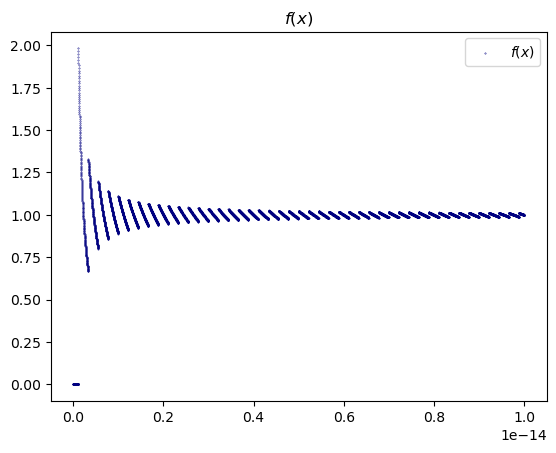

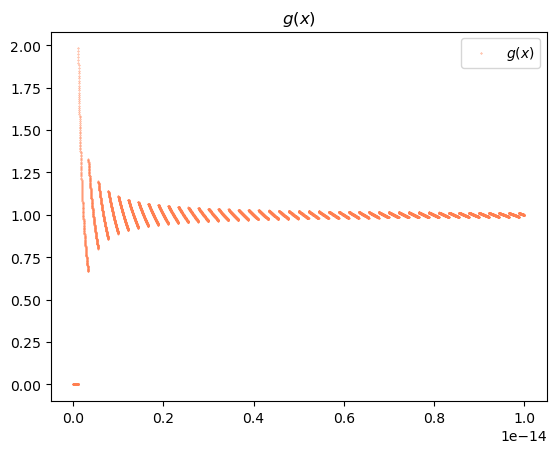

In [3]:
def f(x):
    return ((1+x)-1)/x

def g(x):
    return (np.exp(x)-1)/x

# Next of we make out two graphs
x = np.linspace(0, 10e-15, 10000)
y1 = [f(xval) for xval in x]
y2 = [g(xval) for xval in x]

plt.scatter(x,y1, color="navy",s=0.1,label = "$f(x)$")
plt.legend(loc="best")
plt.title("$f(x)$")
plt.show()
plt.scatter(x,y2,s=0.1, color="coral",label ="$g(x)$")
plt.legend(loc="best")
plt.title("$g(x)$")
plt.show()

## Eine Erklärung zu den Verlauf dieser Graphen

Dargestellt ist hier die numerische Instabilität der beiden Algorithmen hierbei kann man dies wie folgt erklären.



+ Betrachten wir zuerst $\frac{(1+x)-1}{x} = \frac{x}{x}= 1$

Diese Funktion sollte eigentlich konstant 1 sein. jedoch betrachte folgendes Resultat

In [76]:
print("Nominator: ", (1+1e-15) - 1)
print("Demominator: ", (1e-15))

Nominator:  1.1102230246251565e-15
Demominator:  1e-15


Das Problem ist hierbei wie in der letzten Übungstunde aufgrund der begrenzten Maschinenpräzision und der Präzision der Gleitkommadarstellung in Python ergibt die Subtraktion nach der Addition.

Im Skript wurde ja auch unter Beispiel 2.9 die Kondition der Addition und Subtraktion behandelt.

Man erhält für $k_{rel}= \frac{|x| + |y|}{|x+y|}$ sprich für $x \approx y$ einen hohen Wert und eine schlechte Konditionierung. Man hat also also hier das klassische Phänomen der Auslöschung 

+ Betrachte nun $\frac{e^x - 1}{x}$


Beim bilden des Grenzwertes $x \to 0$ wird klar

$\lim_{x \to 0} \frac{e^x - 1}{x} = 1$

In [ ]:
print(np.exp(1e-15))
print(np.exp(1e-15)-1)

1.000000000000001
1.1102230246251565e-15


Gleich wie bei der ersten Funktion hat man hier wieder die Subtraktion von sehr ähnlichen Zahlen 
was im allgemeine  nach Beispiel 2.9 schlecht Konditioniert ist und somit zu Instabiler Berechnung führt. Das t dann diesen

# Aufgabe 2

a)

Bestimmen Sie jeweils die absolute Kondition der folgenden Funktionen und diskutieren Sie
diese experimentell, indem Sie $|f (\tilde{x}) − f (x)|$ und $|\tilde{x}− x|$ vergleichen. Betrachten Sie hierbei verschiedene Werte für x und ˜x.


Erläuterung Kondition eines Problems

Das Problem wird allgemein mit einer Abbildung $P$ beschrieben. Dafür ist $x$ eine Eingabe und $P(x)$ das Resultat.

Definition 2.5

> Das Problem ist sachgemäß gestellt in $E_\delta(x) \Leftrightarrow$ Es exestiert ein $L(\delta) \geq 0$ sodass für alle $\bar{x} \in E_\delta(x)$ gilt:
> $|| P(\tilde{x}-P(x)) \leq L(\delta) * ||\tilde{x} -x ||$

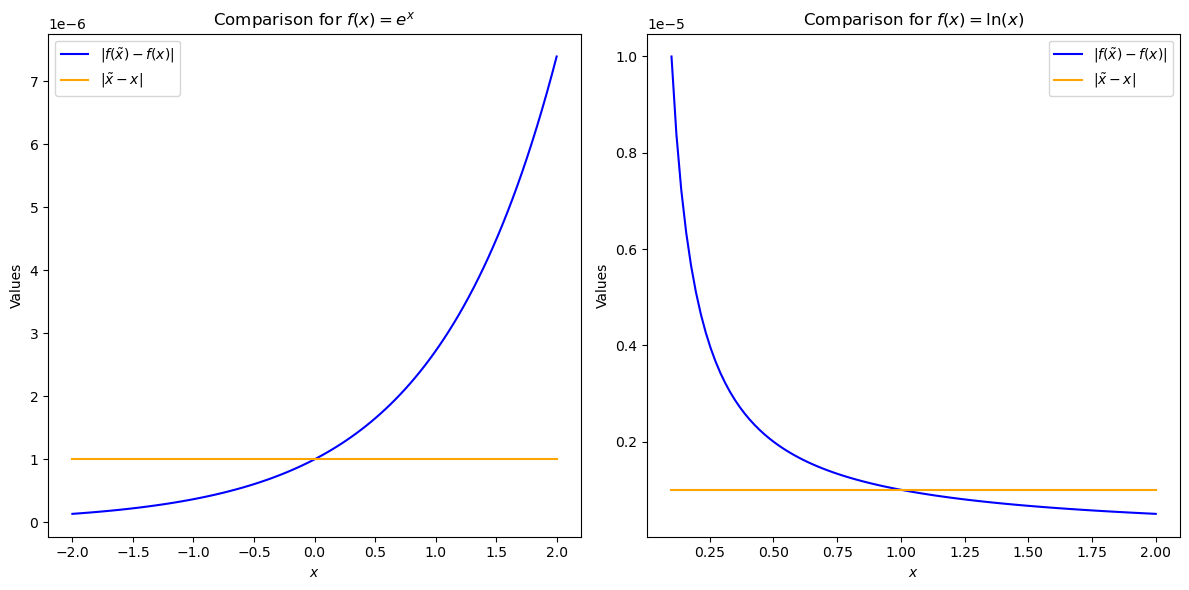

In [95]:
def f_exp(x):
    return np.exp(x)

def f_ln(x):
    return np.log(x)


# So basically we can define this absolute condition as a function

def absolute_condition(f,x,epsilon = 1e-6):
    """
    Calculates both ||f(x')-f(x)|| and |x' - x| given a small pertubation epsilon

    Attributes:
        f: function
        x: int
        epsilon constant
    """

    x_tilde = x + epsilon
    delta_f = np.abs(f(x_tilde)-f(x))
    delta_x = np.abs(x_tilde-x)
    return delta_f, delta_x

# Now we can define some values for x
x_vals_exp = np.linspace(-2,2,100)
x_vals_ln = np.linspace(0.1,2,100)

delta_f_exp = []
delta_x_exp = []
delta_f_ln = []
delta_x_ln = []

for x in x_vals_exp:
    delta_f,delta_x = absolute_condition(f_exp,x)
    delta_f_exp.append(delta_f)
    delta_x_exp.append(delta_x)

for x in x_vals_ln:
    delta_f,delta_x = absolute_condition(f_ln,x)
    delta_f_ln.append(delta_f)
    delta_x_ln.append(delta_x)

plt.figure(figsize=(12, 6))

# Plot for exp(x)
plt.subplot(1, 2, 1)
plt.plot(x_vals_exp, delta_f_exp, label=r"$|f(\tilde{x}) - f(x)|$", color='blue')
plt.plot(x_vals_exp, delta_x_exp, label=r"$|\tilde{x} - x|$", color='orange')
plt.title(r"Comparison for $f(x) = e^x$")
plt.xlabel(r"$x$")
plt.ylabel("Values")
plt.legend()

# Plot for ln(x)
plt.subplot(1, 2, 2)
plt.plot(x_vals_ln, delta_f_ln, label=r"$|f(\tilde{x}) - f(x)|$", color='blue')
plt.plot(x_vals_ln, delta_x_ln, label=r"$|\tilde{x} - x|$", color='orange')
plt.title(r"Comparison for $f(x) = \ln(x)$")
plt.xlabel(r"$x$")
plt.ylabel("Values")
plt.legend()

plt.tight_layout()
plt.show()


Das ist recht cool, jedoch müssen wir die absolute Kondition bestimmen:

Mit $C_abs = \lim_{\epsilon \to O^+} \sup_{||\delta x|| \leq \epsilon} \frac{||\delta f(x)}{||\delta x||}$

So what we can do is to approximate the absolute Condition number via

$C_{abs} \approx \frac{|f(x + \delta x) - f(x)}{|\delta x|}$ where $\delta x$ is a small pertubation we can define

In [96]:
def f_exp(x):
    return np.exp(x)

def f_ln(x):
    return np.log(x)


def absolute_condition_number(f, x, delta_x):
    return np.abs(f(x + delta_x) - f(x)) / np.abs(delta_x)

# Define the pertubation here

delta_x = 1e-8

x_vals_exp = np.linspace(-2,2,100)
x_vals_ln = np.linspace(0.1,2,100)

cond_exp = absolute_condition_number(f_exp, x_vals_exp, delta_x)
cond_ln = absolute_condition_number(f_ln, x_vals_ln, delta_x)

print(f"Absolute condition number expx for delta_x$: {delta_x} ",  max(cond_exp))
print(f"Absolute condition number ln xfor delta_x$: {delta_x} ",  max(cond_ln))



Absolute condition number expx for delta_x$: 1e-08  7.389056033701991
Absolute condition number ln xfor delta_x$: 1e-08  9.99999949513608


Die Funktion $f[0, \infty) \to R: x \to x \sqrt{x + 1} - x \sqrt{x}$ kann äquivalent zu $f(x)= \frac{x}{\sqrt{x+1}+\sqrt{x}}$ umgeformt werden dann implementieren wir mal beide Algorithmen

In [97]:
# Ok lets go and do Function 1

def f1(x):
    s = x+1
    t = np.sqrt(s)
    u = x*t
    v = np.sqrt(x)
    w = x*v
    return u - w

def f2(x):
    s = x +1
    t = np.sqrt(s)
    u = np.sqrt(x)
    v = t+u
    return x / v

# Also we can define f with numpy functions

def f_exact(x):
    return x / (np.sqrt(x) - np.sqrt(x+1))

# Point and pertubation 

x = 1e8
d_x = np.linspace(1e-8, 1e-4, 1000)

x_t = x + d_x


# then apply our f to x

f1_x = f1(x)
f2_x = f2(x)

# finally we can use all of our pertubation values and calculate the maximum 

abs_cond_f1 = [np.abs((f1_x - f1(t))/(x-t)) for t in x_t]
abs_cond_f2 = [np.abs((f2_x - f2(t))/(x-t)) for t in x_t]

print("Condition number max f1:", np.max(abs_cond_f1))
print("Condition number max for f2:",np.max(abs_cond_f2))

# Visualize the process of f1
print("-------------Algorithm 1 -----------------")
print("s", 1e8 +1)
print("t", np.sqrt(1e8+1))
print("u", 1e8 * np.sqrt(1e8+1))
print("v", np.sqrt(1e8))
print("w", 1e8 * np.sqrt(1e8))
print((1e8 * np.sqrt(1e8+1))- (1e8 * np.sqrt(1e8)))

print("-------------Algorithm 2 -----------------")
print("s", 1e8 + 1)
print("t", np.sqrt(1e8 + 1))
print("u", np.sqrt(1e8))
print("v", np.sqrt(1e8 + 1)+ np.sqrt(1e8))
print(1e8 / (np.sqrt(1e8 + 1)+ np.sqrt(1e8)))



Condition number max f1: 8192.0
Condition number max for f2: 6.103515625e-05
-------------Algorithm 1 -----------------
s 100000001.0
t 10000.00005
u 1000000005000.0
v 10000.0
w 1000000000000.0
5000.0
-------------Algorithm 2 -----------------
s 100000001.0
t 10000.00005
u 10000.0
v 20000.000050000002
4999.999987499999


Explanation

One can already see that algorithm 2 is much better in this approximation. Basically as a problem we have for algorithm 1 that we substract very very small numbers which is not optimal, the print statements up in the code explain this quite good

# Aufgabe 3

a) 
Schreiben Sie eine Funktion efun in python, welche eine Näherung an die Exponentialfunktion

$e^x = \sum_{n= 0}^{\infty}\frac{x^n}{n!}$

berechnet. Als Übergabewert sollte eine reele Zahl und die Toleranz verwendet werden. Die einzelen summanden werden Rekursiv berechnet

In [98]:
def efun (x,tol,n=0,term=1):
    """
    Python recursive function. What we do is start at term1 and then go up until we
    reach our given tolerance

    Attributes:
        x: exponent of the exponential function
        tol: given tolerance
        n: the current term (we start with zero)
        term: the value for the current term, the recursion starts with 1
    """
    # Basis case
    if abs(term) < tol:
        return term
    # Recursion
    return term + efun(x,tol,n+1,term* (x/(n+1)))

Tol = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]

# Define x value

x = 15

results = []
error = []
num_terms = []

for i in Tol:
      print(f"------------------Tolerance {i}---------------------")
      print(f"Value: {efun(x,i):.4e}                Error {np.abs(efun(x,i) - np.exp(x)):.4e}  ")

------------------Tolerance 0.1---------------------
Value: 3.2690e+06                Error 2.7027e-02  
------------------Tolerance 0.01---------------------
Value: 3.2690e+06                Error 3.1424e-03  
------------------Tolerance 0.001---------------------
Value: 3.2690e+06                Error 3.3472e-04  
------------------Tolerance 0.0001---------------------
Value: 3.2690e+06                Error 3.2777e-05  
------------------Tolerance 1e-05---------------------
Value: 3.2690e+06                Error 2.9597e-06  
------------------Tolerance 1e-06---------------------
Value: 3.2690e+06                Error 2.4680e-07  
------------------Tolerance 1e-07---------------------
Value: 3.2690e+06                Error 1.8626e-08  
------------------Tolerance 1e-08---------------------
Value: 3.2690e+06                Error 9.3132e-10  


Schreiben Sie eine neue Funktion efun2, welche bei Übergabe einer reellen Zahl $x$ und Toleranz
tol eine Näherung von $e^x$ nach folgender Vorschrift berechnet:

+ Mit $x<0$ macht man Näherungsweise efun unter einer Toleranz und dann den Kehrwert
+ Mit $x\geq 0$ macht man einfach den a algorithmus

In [99]:
def efun2(x, tol):
    if x < 0:
        return 1 / efun(-x, tol)
    else:
        return efun(x, tol)
    

x_values = [10, -10, 0.5, -0.5]
tolerances = [0.1, 0.01, 0.001]

for tol in tolerances:
    print("-----------------------------------------------------------")
    print(f"Tolerance: {tol}")
    for x in x_values:
        efun_result = efun(x, tol)
        efun2_result = efun2(x, tol)
        exact_value = np.exp(x)
        error_efun = abs(efun_result - exact_value)
        error_efun2 = abs(efun2_result - exact_value)
        print(f"x = {x}, efun(x) = {efun_result:.4e}, error = {error_efun:.4e}")
        print(f"x = {x}, efun2(x) = {efun2_result:.4e}, error = {error_efun2:.4e}")
    print("-----------------------------------------------------------")

-----------------------------------------------------------
Tolerance: 0.1
x = 10, efun(x) = 2.2026e+04, error = 4.9637e-02
x = 10, efun2(x) = 2.2026e+04, error = 4.9637e-02
x = -10, efun(x) = -2.4289e-02, error = 2.4334e-02
x = -10, efun2(x) = 4.5400e-05, error = 1.0231e-10
x = 0.5, efun(x) = 1.6458e+00, error = 2.8879e-03
x = 0.5, efun2(x) = 1.6458e+00, error = 2.8879e-03
x = -0.5, efun(x) = 6.0417e-01, error = 2.3640e-03
x = -0.5, efun2(x) = 6.0759e-01, error = 1.0643e-03
-----------------------------------------------------------
-----------------------------------------------------------
Tolerance: 0.01
x = 10, efun(x) = 2.2026e+04, error = 1.7585e-03
x = 10, efun2(x) = 2.2026e+04, error = 1.7585e-03
x = -10, efun(x) = 9.7034e-04, error = 9.2494e-04
x = -10, efun2(x) = 4.5400e-05, error = 3.6246e-12
x = 0.5, efun(x) = 1.6484e+00, error = 2.8377e-04
x = 0.5, efun2(x) = 1.6484e+00, error = 2.8377e-04
x = -0.5, efun(x) = 6.0677e-01, error = 2.4017e-04
x = -0.5, efun2(x) = 6.0664e-01,

# Berechnung zur Aufgabe 4 c)


Value x=10e-10:  28.78193160031251


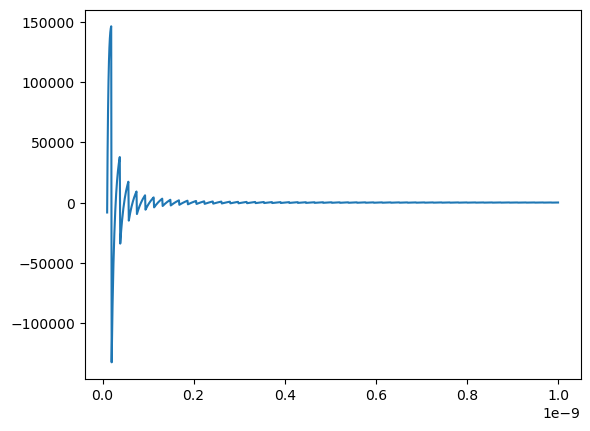

In [100]:
# Berechne für x= 10e-10

def f(x):
    return ((np.log(1-x)+x*np.exp(x))/x**2)

print("Value x=10e-10: ", f(10e-10))

x_vals = np.linspace(10E-12, 0.000000001, 1000)

y = [f(x) for x in x_vals]

plt.plot(x_vals,y)
plt.show()


Verifizieren wir hier für die d) einen algorithmus für die taylor approximation


$f(x) = \frac{(-x+ \frac{x^2}{2}) + x(1+x+\frac{x^2}{2})}{x^2}$

1.500000223816922


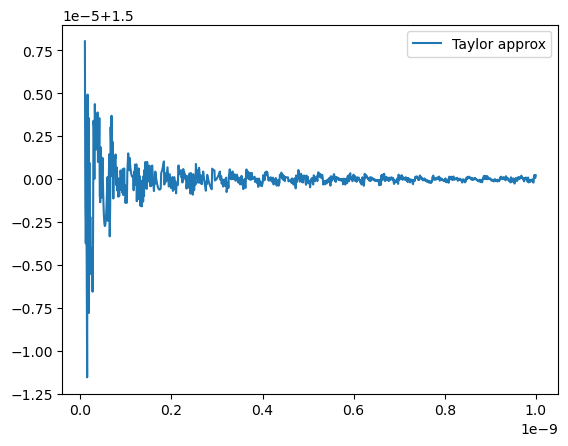

In [101]:
def f_taylor(x):
    return(((-x+(x**2*0.5)+x*(1+x+(x**2)*0.5))/x**2))


print(f_taylor(10e-10))

y_taylor = [f_taylor(x) for x in x_vals]

#plt.plot(x_vals,y,label="Normal Algorithm")
plt.plot(x_vals,y_taylor,label="Taylor approx")
plt.legend()
plt.show()

Betrachten wir für x=10e-10 die Berechnung hierzu einfach mal Schrittweise

Wichtig ist eben zu beachten das man für solche kleinen Werte den log(1) verhindert, da dieser zu numerischer Instabilität führt. auch könnte man sogar durch die Taylorapproximation ein x im Nenner kürzen was den Bruch noch weiter vereinfacht

In [102]:
print("Log: ", np.log(1-10E-10))

# Man sieht hier bei dem Logarithmus bereits das Problem

print("Taylor approx: ", (-10e-10 -(10e-10)**2 * 0.5))

print("Exponential Func ", np.exp(10e-10))

print("Taylore approx: ", 1 + 10e-10 + (10e-10)**2 *0.5)

# man sieht jetzt für die Exponentialfunktion machts nicht so viel unterschied t

Log:  -9.999999722180686e-10
Taylor approx:  -1.0000000005000001e-09
Exponential Func  1.000000001
Taylore approx:  1.000000001
